# Предобработка данных.

**Подключение библиотек и скриптов**

In [2]:
import numpy as np
import pandas as pd

ModuleNotFoundError: No module named 'pandas'

**Пути к директориям и файлам**

https://drive.google.com/file/d/1VKxHc-pMJa5WqSJ1ZJtxdm3ckAvqLAPb

In [ ]:
!wget 'https://drive.google.com/uc?id=1VKxHc-pMJa5WqSJ1ZJtxdm3ckAvqLAPb' -O housing.csv

--2024-10-04 06:19:08--  https://drive.google.com/uc?id=1VKxHc-pMJa5WqSJ1ZJtxdm3ckAvqLAPb
Resolving drive.google.com (drive.google.com)... 74.125.135.100, 74.125.135.139, 74.125.135.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.135.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1VKxHc-pMJa5WqSJ1ZJtxdm3ckAvqLAPb [following]
--2024-10-04 06:19:08--  https://drive.usercontent.google.com/download?id=1VKxHc-pMJa5WqSJ1ZJtxdm3ckAvqLAPb
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.195.132, 2607:f8b0:400e:c09::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.195.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1554964 (1.5M) [application/octet-stream]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.48M  --.-KB/s    in 0.03s   

2024-10-04 06:19:11 (52.1 MB/s) - 

In [ ]:
DATASET_PATH = './housing.csv'
PREPARED_DATASET_PATH = './housing_prepared.csv'

## 1. Загрузка данных

**Описание задачи**

Цель - предсказать стоимость дома

**Описание датасета**

Статистические данные о ряде домов в Калифорнии, основанные на переписи 1990 года.

* **longitude** - долгота
* **latitude** - широта
* **housing_median_age** - средний возраст дома
* **total_rooms** - общее количество комнат
* **total_bedrooms** - общее количество спален
* **population** - количество проживающих
* **households** - домохозяйства
* **ocean_proximity** - близость океана
* **median_income** - средний доход
* **median_house_value** - средняя стоимость дома

Считываем данные. По строкам - наблюдения, по столбцам - признаки.

In [ ]:
df = pd.read_csv(DATASET_PATH, sep=',')
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,5
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,6
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,7
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,8
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,9


In [ ]:
df.tail(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
20637,-121.22,39.43,17.0,2254.0,485.0,NaN,433.0,1.7000,92300.0,INLAND,20637
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,20638
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND,20639


In [ ]:
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
5884,-118.34,34.16,44.0,1717.0,391.0,848.0,353.0,3.6111,254500.0,<1H OCEAN,5884
14088,-117.09,32.76,43.0,3889.0,711.0,1466.0,663.0,3.5529,223000.0,NEAR OCEAN,14088
17975,-121.96,37.31,31.0,3890.0,711.0,1898.0,717.0,5.2534,290900.0,<1H OCEAN,17975
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN,860
7568,-118.19,33.89,38.0,4018.0,986.0,3702.0,927.0,2.9293,113600.0,<1H OCEAN,7568


С помощью .sample можно получить случайную долю объектов, либо перемешать весь датасет

In [ ]:
df.sample(frac=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
9856,-121.86,36.58,20.0,6332.0,991.0,2668.0,955.0,5.7578,347700.0,<1H OCEAN,9856
17391,-120.44,34.96,30.0,1685.0,315.0,1290.0,368.0,3.4722,112500.0,<1H OCEAN,17391
1791,-122.37,37.93,45.0,3150.0,756.0,1798.0,749.0,1.7500,37900.0,NEAR BAY,1791
20036,-118.93,36.10,19.0,2988.0,681.0,1654.0,576.0,2.3792,90000.0,INLAND,20036
14032,-117.15,32.74,26.0,3149.0,832.0,1320.0,808.0,3.0259,211700.0,NEAR OCEAN,14032
...,...,...,...,...,...,...,...,...,...,...,...
15930,-122.43,37.73,52.0,1985.0,401.0,1337.0,424.0,4.1071,240900.0,NEAR BAY,15930
15762,-122.43,37.77,52.0,1567.0,482.0,654.0,425.0,2.6914,366700.0,NEAR BAY,15762
5456,-118.47,34.00,38.0,1235.0,390.0,891.0,376.0,2.7143,287500.0,<1H OCEAN,5456
18992,-122.00,38.41,11.0,2838.0,429.0,1331.0,426.0,4.9450,298400.0,INLAND,18992


In [ ]:
df.shape

(20640, 11)

In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'id'],
      dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=20640, step=1)

Фильтрация данных с помощью булевых масок

In [ ]:
df['population']

,population
0,322.0
1,2401.0
2,496.0
3,558.0
4,565.0
...,...
20635,845.0
20636,356.0
20637,NaN
20638,741.0


In [ ]:
df['population'] > 400

,population
0,False
1,True
2,True
3,True
4,True
...,...
20635,True
20636,False
20637,False
20638,True


In [ ]:
df[df['population'] > 400].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,5


In [ ]:
df[(df['population'] > 100) & (df['households'] > 100)].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4


In [ ]:
df[(df['population'] > 500) | (df['households'] > 100)].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4


In [ ]:
~(df['population'] > 100)  # == df['population'] <= 100

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637     True
20638    False
20639    False
Name: population, Length: 20640, dtype: bool

In [ ]:
# ~(df['population'] > 100) == (df['population'] <= 100)

In [ ]:
df[~(df['population'] > 100)].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
34,-122.27,37.83,51.0,2665.0,574.0,NaN,536.0,2.7303,109700.0,NEAR BAY,34
59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,59
61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,61
73,-122.29,37.81,46.0,12.0,4.0,18.0,7.0,0.4999,67500.0,NEAR BAY,73
121,-122.24,37.85,37.0,334.0,54.0,98.0,47.0,4.9643,335000.0,NEAR BAY,121


In [ ]:
tmp = df[~(df['population'] > 100)]
tmp.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
34,-122.27,37.83,51.0,2665.0,574.0,NaN,536.0,2.7303,109700.0,NEAR BAY,34
59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,59
61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,61
73,-122.29,37.81,46.0,12.0,4.0,18.0,7.0,0.4999,67500.0,NEAR BAY,73
121,-122.24,37.85,37.0,334.0,54.0,98.0,47.0,4.9643,335000.0,NEAR BAY,121


In [ ]:
tmp.index

Index([   34,    59,    61,    73,   121,   129,   140,   167,   194,   201,
       ...
       20452, 20453, 20484, 20489, 20502, 20571, 20624, 20625, 20633, 20637],
      dtype='int64', length=828)

Взятие наблюдения по индексу

In [ ]:
tmp.iloc[5]

,129
longitude,-122.2
latitude,37.84
housing_median_age,30.0
total_rooms,2211.0
total_bedrooms,346.0
population,NaN
households,343.0
median_income,6.0666
median_house_value,311500.0
ocean_proximity,NEAR BAY


In [ ]:
tmp.loc[59]

,59
longitude,-122.29
latitude,37.82
housing_median_age,2.0
total_rooms,158.0
total_bedrooms,43.0
population,94.0
households,57.0
median_income,2.5625
median_house_value,60000.0
ocean_proximity,NEAR BAY


In [ ]:
tmp.loc[:61]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
34,-122.27,37.83,51.0,2665.0,574.0,NaN,536.0,2.7303,109700.0,NEAR BAY,34
59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,59
61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,61


In [ ]:
tmp.iloc[:5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
34,-122.27,37.83,51.0,2665.0,574.0,NaN,536.0,2.7303,109700.0,NEAR BAY,34
59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,59
61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,61
73,-122.29,37.81,46.0,12.0,4.0,18.0,7.0,0.4999,67500.0,NEAR BAY,73
121,-122.24,37.85,37.0,334.0,54.0,98.0,47.0,4.9643,335000.0,NEAR BAY,121


In [ ]:
tmp.iloc[-6:-2]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
20502,-118.68,34.33,45.0,121.0,25.0,67.0,27.0,2.9821,325000.0,<1H OCEAN,20502
20571,-121.99,38.53,6.0,4598.0,834.0,NaN,812.0,3.4186,127300.0,INLAND,20571
20624,-121.41,39.04,16.0,1698.0,300.0,NaN,291.0,3.0739,87200.0,INLAND,20624
20625,-121.52,39.12,37.0,102.0,17.0,29.0,14.0,4.1250,72000.0,INLAND,20625


In [ ]:
tmp.loc[-6:-2]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id


In [ ]:
tmp.loc[[34, 59], ['longitude', 'latitude',]]  # индексы

,longitude,latitude
34,-122.27,37.83
59,-122.29,37.82


In [ ]:
tmp.iloc[[0, 4, 10], [0, 1, 5]]  # порядковые индексы

,longitude,latitude,population
34,-122.27,37.83,NaN
121,-122.24,37.85,98.0
202,-122.23,37.78,NaN


## 2. Приведение типов данных<a class='anchor' id='types'>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  19918 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20041 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
 10  id                  20640 non-null  int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 1.7+ MB


In [ ]:
df.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
ocean_proximity,object


In [ ]:
type(df[['longitude', 'latitude']])

pandas.core.frame.DataFrame

In [ ]:
df['id'].dtype

dtype('int64')

In [ ]:
df['id']

,id
0,0
1,1
2,2
3,3
4,4
...,...
20635,20635
20636,20636
20637,20637
20638,20638


In [ ]:
df['id'].values

array([    0,     1,     2, ..., 20637, 20638, 20639])

In [ ]:
type(df['id'].values)

numpy.ndarray

In [ ]:
df.values

array([[-122.23, 37.88, 41.0, ..., 452600.0, 'NEAR BAY', 0],
       [-122.22, 37.86, 21.0, ..., 358500.0, 'NEAR BAY', 1],
       [-122.24, 37.85, 52.0, ..., 352100.0, 'NEAR BAY', 2],
       ...,
       [-121.22, 39.43, 17.0, ..., 92300.0, 'INLAND', 20637],
       [-121.32, 39.43, 18.0, ..., 84700.0, 'INLAND', 20638],
       [-121.24, 39.37, 16.0, ..., 89400.0, 'INLAND', 20639]],
      dtype=object)

In [ ]:
df['id'].index

RangeIndex(start=0, stop=20640, step=1)

In [ ]:
df['id'] = df['id'].astype(str)
df['id'].dtype

dtype('O')

## Анализ данных

### Обзор количественных переменных<a class='anchor' id='numeric'>
    
*Количественные (непрерывные) переменные*  - это переменные, которые могут принимать любые числовые значения в некотором диапазоне.

Непрерывные и дискретные

In [ ]:
df_num_features = df.select_dtypes(include=['float'])
df_num_features.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


С помощью .describe можно получить первичное понимание того, что из себя представляют данные

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,19918.000000,20640.000000,20433.000000,20041.000000,20640.000000,20640.000000,20640.000000
mean,-119.471242,35.036934,28.653630,2635.763081,537.870553,1425.418243,499.539680,3.870671,206855.816909
std,5.041408,94.903955,12.576796,2181.615252,421.385070,1135.185798,382.329753,1.899822,115395.615874
min,-124.350000,-13534.030000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,786.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1165.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1726.000000,605.000000,4.743250,264725.000000
max,122.030000,1327.130000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  19918 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20041 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
 10  id                  20640 non-null  object 
dtypes: float64(9), object(2)
memory usage: 1.7+ MB


### Обзор номинативных переменных<a class='anchor' id='cats'>
    
*Номинативная (категориальная) переменная* - тип дискретной переменной, качественная (неколичественная) переменная величина

Номинативные, порядковые<br>
Бинарные

In [ ]:
df_obj_features = df.select_dtypes(include='object')
df_obj_features.head()

,ocean_proximity,id
0,NEAR BAY,0
1,NEAR BAY,1
2,NEAR BAY,2
3,NEAR BAY,3
4,NEAR BAY,4


In [ ]:
df.describe(include=['object'])

,ocean_proximity,id
count,20640,20640
unique,6,20640
top,<1H OCEAN,0
freq,9127,1


In [ ]:
df_obj_features.describe()

,ocean_proximity,id
count,20640,20640
unique,6,20640
top,<1H OCEAN,0
freq,9127,1


In [ ]:
df['ocean_proximity'].value_counts(normalize=True)

,proportion
ocean_proximity,
<1H OCEAN,0.442200
INLAND,0.316957
NEAR OCEAN,0.128634
NEAR BAY,0.110853
-,0.001114
ISLAND,0.000242


In [ ]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', '-', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
df['ocean_proximity'].nunique()

6

### 🧠 Упражнение: подсчет среднего


Возьмите дома, которые находятся у океана (`NEAR OCEAN`) и около бухты (`NEAR BAY`) и по отдельности у них посчитатайте среднее кол-во населения (`population`) и среднюю стоимость недвижимости (`median_house_value`)

NEAR OCEAN
population              1351.761702
median_house_value    249505.390584
dtype: float64

NEAR BAY
population              1224.861913
median_house_value    259320.058566
dtype: float64


#### 🧠 Упражнение: подсчет среднего (ответ)


In [ ]:
print('NEAR OCEAN')
print(df[df['ocean_proximity'] == 'NEAR OCEAN'][['population', 'median_house_value']].mean())
print()
print('NEAR BAY')
print(df[df['ocean_proximity'] == 'NEAR BAY'][['population', 'median_house_value']].mean())

NEAR OCEAN
population              1351.761702
median_house_value    249505.390584
dtype: float64

NEAR BAY
population              1224.861913
median_house_value    259320.058566
dtype: float64


In [ ]:
# можно через группировки, но об этом на следующем занятии
near_ocean_stats = df[df['ocean_proximity'] == 'NEAR OCEAN'].agg({
    'population': 'mean',
    'median_house_value': 'mean'
    })

near_bay_stats = df[df['ocean_proximity'] == 'NEAR BAY'].agg({
    'population': 'mean',
    'median_house_value': 'mean'
    })


print('NEAR OCEAN')
print(near_ocean_stats)
print('\nNEAR BAY')
print(near_bay_stats)

NEAR OCEAN
population              1351.761702
median_house_value    249505.390584
dtype: float64

NEAR BAY
population              1224.861913
median_house_value    259320.058566
dtype: float64


In [ ]:
# можно через группировки, но об этом на следующем занятии
tmp = df[df['ocean_proximity'].isin(['NEAR OCEAN', 'NEAR BAY'])]
tmp.groupby('ocean_proximity').mean()[['population', 'median_house_value']]

,population,median_house_value
ocean_proximity,,
NEAR BAY,1224.861913,259320.058566
NEAR OCEAN,1351.761702,249505.390584


## 3. Обработка пропусков<a class='anchor' id='nan'>

Что можно делать с ними?
1. Выкинуть эти данные
2. Заменять пропуски разными методами (медианы, средние значения и т.д.)
3. Делать/не делать дополнительную фичу
4. Обучать модель МО для восстановления данных
4. Ничего не делать

In [ ]:
df.isna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,True,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,722
total_rooms,0
total_bedrooms,207
population,599
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
df.isna().mean()

,0
longitude,0.000000
latitude,0.000000
housing_median_age,0.034981
total_rooms,0.000000
total_bedrooms,0.010029
population,0.029021
households,0.000000
median_income,0.000000
median_house_value,0.000000
ocean_proximity,0.000000


**housing_median_age**

Создадим вспомогательный признак и заполним его 0, если пропуска в housing_median_age нет и 1, когда пропуски есть

In [ ]:
df['housing_median_age_nan'] = 0
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,20635,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,20636,0
20637,-121.22,39.43,17.0,2254.0,485.0,NaN,433.0,1.7000,92300.0,INLAND,20637,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,20638,0


In [ ]:
df['housing_median_age'].isna()

,housing_median_age
0,False
1,False
2,False
3,False
4,False
...,...
20635,False
20636,False
20637,False
20638,False


In [ ]:
df[df['housing_median_age'].isna()]['housing_median_age_nan'] = 1

<ipython-input-50-99eb982f16ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['housing_median_age'].isna()]['housing_median_age_nan'] = 1


In [ ]:
df['housing_median_age_nan'].value_counts()

,count
housing_median_age_nan,
0,20640


In [ ]:
df.loc[df['housing_median_age'].isna(), 'housing_median_age_nan'] = 1

In [ ]:
df['housing_median_age_nan'].value_counts()

,count
housing_median_age_nan,
0,19918
1,722


In [ ]:
df.loc[df['housing_median_age'].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan
25,-122.28,37.85,NaN,535.0,123.0,317.0,119.0,2.4038,107500.0,NEAR BAY,25,1
117,-122.25,37.83,NaN,4190.0,1105.0,1786.0,1037.0,3.0897,234100.0,NEAR BAY,117,1
138,-122.20,37.82,NaN,1229.0,181.0,420.0,176.0,7.0175,366700.0,NEAR BAY,138,1
170,-122.25,37.79,NaN,629.0,188.0,742.0,196.0,2.6458,125000.0,NEAR BAY,170,1
299,-122.17,37.76,NaN,1764.0,397.0,987.0,354.0,2.4333,98200.0,NEAR BAY,299,1
...,...,...,...,...,...,...,...,...,...,...,...,...
20531,-121.81,38.58,NaN,1964.0,314.0,808.0,286.0,5.9629,286000.0,INLAND,20531,1
20536,-121.73,38.55,NaN,1717.0,393.0,1224.0,387.0,2.7917,130800.0,INLAND,20536,1
20600,-121.57,39.16,NaN,1632.0,367.0,769.0,330.0,3.1029,71700.0,INLAND,20600,1
20601,-121.57,39.13,NaN,442.0,103.0,413.0,88.0,1.5694,57900.0,INLAND,20601,1


In [ ]:
df[df['housing_median_age_nan'] == 1]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan
25,-122.28,37.85,NaN,535.0,123.0,317.0,119.0,2.4038,107500.0,NEAR BAY,25,1
117,-122.25,37.83,NaN,4190.0,1105.0,1786.0,1037.0,3.0897,234100.0,NEAR BAY,117,1
138,-122.20,37.82,NaN,1229.0,181.0,420.0,176.0,7.0175,366700.0,NEAR BAY,138,1
170,-122.25,37.79,NaN,629.0,188.0,742.0,196.0,2.6458,125000.0,NEAR BAY,170,1
299,-122.17,37.76,NaN,1764.0,397.0,987.0,354.0,2.4333,98200.0,NEAR BAY,299,1
...,...,...,...,...,...,...,...,...,...,...,...,...
20531,-121.81,38.58,NaN,1964.0,314.0,808.0,286.0,5.9629,286000.0,INLAND,20531,1
20536,-121.73,38.55,NaN,1717.0,393.0,1224.0,387.0,2.7917,130800.0,INLAND,20536,1
20600,-121.57,39.16,NaN,1632.0,367.0,769.0,330.0,3.1029,71700.0,INLAND,20600,1
20601,-121.57,39.13,NaN,442.0,103.0,413.0,88.0,1.5694,57900.0,INLAND,20601,1


In [ ]:
df['housing_median_age_nan'].value_counts()

,count
housing_median_age_nan,
0,19918
1,722


In [ ]:
median = df['housing_median_age'].median()
df['housing_median_age'].fillna(median).isna().sum()

0

In [ ]:
df['housing_median_age'].isna().sum()

722

In [ ]:
# df['housing_median_age'] = df['housing_median_age'].fillna(median)
df['housing_median_age'].fillna(median, inplace=True)

<ipython-input-59-df3fa09592e2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['housing_median_age'].fillna(median, inplace=True)


In [ ]:
df['housing_median_age'].isna().sum()

0

In [ ]:
df[df['housing_median_age_nan'] == 1]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan
25,-122.28,37.85,29.0,535.0,123.0,317.0,119.0,2.4038,107500.0,NEAR BAY,25,1
117,-122.25,37.83,29.0,4190.0,1105.0,1786.0,1037.0,3.0897,234100.0,NEAR BAY,117,1
138,-122.20,37.82,29.0,1229.0,181.0,420.0,176.0,7.0175,366700.0,NEAR BAY,138,1
170,-122.25,37.79,29.0,629.0,188.0,742.0,196.0,2.6458,125000.0,NEAR BAY,170,1
299,-122.17,37.76,29.0,1764.0,397.0,987.0,354.0,2.4333,98200.0,NEAR BAY,299,1
...,...,...,...,...,...,...,...,...,...,...,...,...
20531,-121.81,38.58,29.0,1964.0,314.0,808.0,286.0,5.9629,286000.0,INLAND,20531,1
20536,-121.73,38.55,29.0,1717.0,393.0,1224.0,387.0,2.7917,130800.0,INLAND,20536,1
20600,-121.57,39.16,29.0,1632.0,367.0,769.0,330.0,3.1029,71700.0,INLAND,20600,1
20601,-121.57,39.13,29.0,442.0,103.0,413.0,88.0,1.5694,57900.0,INLAND,20601,1


Если придумали другой способ работы с пропусками

In [ ]:
df.loc[df['housing_median_age_nan'] == 1, 'housing_median_age'] = np.NaN
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,722
total_rooms,0
total_bedrooms,207
population,599
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
df['housing_median_age'].fillna(df['housing_median_age'].mean(), inplace=True)
df.isna().sum()

<ipython-input-63-ea7cbef85a30>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['housing_median_age'].fillna(df['housing_median_age'].mean(), inplace=True)


,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,599
households,0
median_income,0
median_house_value,0
ocean_proximity,0


**total_bedrooms**

In [ ]:
df['total_bedrooms'].isna().sum()

207

In [ ]:
median = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median, inplace=True)

<ipython-input-65-beeed23f9b8d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(median, inplace=True)


In [ ]:
df['total_bedrooms'].isna().sum()

0

**population**

In [ ]:
median = df['population'].median()
df['population'].fillna(median, inplace=True)

<ipython-input-67-6e926357e73a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['population'].fillna(median, inplace=True)


In [ ]:
df['population'].isna().sum()

0

**все вместе**

In [ ]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
medians = df[['housing_median_age', 'total_bedrooms', 'population']].median()
medians

,0
housing_median_age,28.65363
total_bedrooms,435.00000
population,1165.00000


In [ ]:
df[['housing_median_age', 'total_bedrooms', 'population']] = \
    df[['housing_median_age', 'total_bedrooms', 'population']].fillna(medians)

In [ ]:
# df[['housing_median_age', 'total_bedrooms', 'population']].fillna(medians, inplace=True)

In [ ]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


**ocean_proximity**

In [ ]:
df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9127
INLAND,6542
NEAR OCEAN,2655
NEAR BAY,2288
-,23
ISLAND,5


In [ ]:
df['ocean_proximity_nan'] = 0
df.loc[df['ocean_proximity'] == '-', 'ocean_proximity_nan'] = 1

In [ ]:
df[df['ocean_proximity_nan'] == 1].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan,ocean_proximity_nan
1153,-121.46,39.54,14.0,5549.0,1000.0,1822.0,919.0,2.9562,142300.0,-,1153,0,1
2435,-119.59,36.57,19.0,1733.0,303.0,911.0,281.0,3.5987,131700.0,-,2435,0,1
2636,-124.15,40.59,39.0,1186.0,238.0,539.0,212.0,2.0938,79600.0,-,2636,0,1
5980,-117.74,34.10,26.0,2723.0,604.0,1847.0,498.0,2.6779,136000.0,-,5980,0,1
6373,-118.02,34.15,44.0,2419.0,437.0,1045.0,432.0,3.8750,280800.0,-,6373,0,1


### Перевод в np.nan

In [ ]:
df.loc[df['ocean_proximity'] == '-', 'ocean_proximity'] = np.nan
df['ocean_proximity'].isna().sum()

23

In [ ]:
df[df['ocean_proximity_nan'] == 1].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan,ocean_proximity_nan
1153,-121.46,39.54,14.0,5549.0,1000.0,1822.0,919.0,2.9562,142300.0,NaN,1153,0,1
2435,-119.59,36.57,19.0,1733.0,303.0,911.0,281.0,3.5987,131700.0,NaN,2435,0,1
2636,-124.15,40.59,39.0,1186.0,238.0,539.0,212.0,2.0938,79600.0,NaN,2636,0,1
5980,-117.74,34.10,26.0,2723.0,604.0,1847.0,498.0,2.6779,136000.0,NaN,5980,0,1
6373,-118.02,34.15,44.0,2419.0,437.0,1045.0,432.0,3.8750,280800.0,NaN,6373,0,1


In [ ]:
df['ocean_proximity'].mode()[0]

'<1H OCEAN'

In [ ]:
df['ocean_proximity'].fillna(df['ocean_proximity'].mode()[0], inplace=True)
df['ocean_proximity'].isna().sum()

<ipython-input-80-cf8741324966>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ocean_proximity'].fillna(df['ocean_proximity'].mode()[0], inplace=True)


0

In [ ]:
df[df['ocean_proximity_nan'] == 1].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan,ocean_proximity_nan
1153,-121.46,39.54,14.0,5549.0,1000.0,1822.0,919.0,2.9562,142300.0,<1H OCEAN,1153,0,1
2435,-119.59,36.57,19.0,1733.0,303.0,911.0,281.0,3.5987,131700.0,<1H OCEAN,2435,0,1
2636,-124.15,40.59,39.0,1186.0,238.0,539.0,212.0,2.0938,79600.0,<1H OCEAN,2636,0,1
5980,-117.74,34.10,26.0,2723.0,604.0,1847.0,498.0,2.6779,136000.0,<1H OCEAN,5980,0,1
6373,-118.02,34.15,44.0,2419.0,437.0,1045.0,432.0,3.8750,280800.0,<1H OCEAN,6373,0,1


### Через replace без перевода в np.nan

In [ ]:
df.loc[df['ocean_proximity_nan'] == 1, 'ocean_proximity'] = '-'
df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9127
INLAND,6542
NEAR OCEAN,2655
NEAR BAY,2288
-,23
ISLAND,5


Заменим значение "-" в признаке ocean_proximity на самое популярное значение в признаке, то есть на моду.

In [ ]:
df.replace(
    {'ocean_proximity':
     {'-': df['ocean_proximity'].mode()[0]}
    },
    inplace=True)

In [ ]:
df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9150
INLAND,6542
NEAR OCEAN,2655
NEAR BAY,2288
ISLAND,5


In [ ]:
df[df['ocean_proximity_nan'] == 1].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan,ocean_proximity_nan
1153,-121.46,39.54,14.0,5549.0,1000.0,1822.0,919.0,2.9562,142300.0,<1H OCEAN,1153,0,1
2435,-119.59,36.57,19.0,1733.0,303.0,911.0,281.0,3.5987,131700.0,<1H OCEAN,2435,0,1
2636,-124.15,40.59,39.0,1186.0,238.0,539.0,212.0,2.0938,79600.0,<1H OCEAN,2636,0,1
5980,-117.74,34.10,26.0,2723.0,604.0,1847.0,498.0,2.6779,136000.0,<1H OCEAN,5980,0,1
6373,-118.02,34.15,44.0,2419.0,437.0,1045.0,432.0,3.8750,280800.0,<1H OCEAN,6373,0,1


## 4. Обработка выбросов<a class='anchor' id='outlier'>
    
**Выбросы** - это объекты в данных, которые не принадлежат определенной зависимости. Это ненормальное наблюдение, которое находятся далеко от других наблюдений.

Что можно делать с ними?
1. Выкинуть эти данные
2. Заменять выбросы разными методами (медианы, средние значения и т.д.)
3. Делать/не делать дополнительную фичу
4. Обучать модель МО для восстановления данных

4. Ничего не делать

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,housing_median_age_nan,ocean_proximity_nan
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.471242,35.036934,28.653630,2635.763081,536.838857,1417.860562,499.539680,3.870671,206855.816909,0.034981,0.001114
std,5.041408,94.903955,12.354855,2181.615252,419.391878,1119.445348,382.329753,1.899822,115395.615874,0.183735,0.033364
min,-124.350000,-13534.030000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000
25%,-121.800000,33.930000,19.000000,1447.750000,297.000000,797.000000,280.000000,2.563400,119600.000000,0.000000,0.000000
50%,-118.490000,34.260000,28.653630,2127.000000,435.000000,1165.000000,409.000000,3.534800,179700.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1701.000000,605.000000,4.743250,264725.000000,0.000000,0.000000
max,122.030000,1327.130000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000


### Если знаем, что является выбросами

Возможные значения longtitude (долгота) и latitude (широта) можно найти [здесь](https://dateandtime.info/ru/citycoordinates.php?id=5332748)



_Широта принимает значения от −90° до 90°. 0° – широта экватора; −90° – широта Южного полюса; 90° – широта Северного полюса. Положительные значения соответствуют северной широте (точки севернее экватора, сокращённо с.ш. или N); отрицательные – южной широте (точки южнее экватора, сокращённо ю.ш. или S).  
Долгота отсчитывается от нулевого меридиана (IERS Reference Meridian в системе WGS 84) и принимает значения от −180° до 180°. Положительные значения соответствуют восточной долготе (сокращённо в.д. или E); отрицательные – западной долготе (сокращённо з.д. или W)._

Калифорнии находится в западном и северном полушарии.


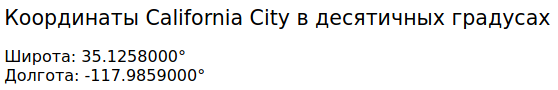

**longitude**

In [ ]:
df[df['longitude'] >= 0]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan,ocean_proximity_nan
3479,118.51,34.29,29.0,1287.0,194.0,525.0,187.0,6.4171,319300.0,<1H OCEAN,3479,0,0
5904,118.43,34.29,39.0,1769.0,410.0,1499.0,390.0,3.1212,153500.0,<1H OCEAN,5904,0,0
8405,118.36,33.93,40.0,1625.0,500.0,2036.0,476.0,2.6298,156500.0,<1H OCEAN,8405,0,0
8636,118.41,33.88,43.0,2492.0,449.0,1033.0,437.0,7.9614,500001.0,<1H OCEAN,8636,0,0
13051,121.29,38.61,17.0,13553.0,2474.0,6544.0,2359.0,3.9727,132700.0,INLAND,13051,0,0
15263,117.27,33.02,21.0,2144.0,340.0,928.0,344.0,5.7980,286100.0,NEAR OCEAN,15263,0,0
17085,0.00,37.47,33.0,1266.0,415.0,1991.0,334.0,2.9200,202800.0,NEAR OCEAN,17085,0,0
17359,0.00,34.88,4.0,3680.0,559.0,1678.0,569.0,5.0639,201700.0,<1H OCEAN,17359,0,0
18551,122.03,36.96,28.0,1607.0,421.0,926.0,385.0,2.4250,216100.0,NEAR OCEAN,18551,0,0
19423,0.00,37.69,5.0,9601.0,1639.0,4449.0,1575.0,4.5332,195500.0,INLAND,19423,0,0


In [ ]:
df['longitude_outlier'] = 0
df.loc[df['longitude'] >= 0, 'longitude_outlier'] = 1

In [ ]:
df[df['longitude'] >= 0]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan,ocean_proximity_nan,longitude_outlier
3479,118.51,34.29,29.0,1287.0,194.0,525.0,187.0,6.4171,319300.0,<1H OCEAN,3479,0,0,1
5904,118.43,34.29,39.0,1769.0,410.0,1499.0,390.0,3.1212,153500.0,<1H OCEAN,5904,0,0,1
8405,118.36,33.93,40.0,1625.0,500.0,2036.0,476.0,2.6298,156500.0,<1H OCEAN,8405,0,0,1
8636,118.41,33.88,43.0,2492.0,449.0,1033.0,437.0,7.9614,500001.0,<1H OCEAN,8636,0,0,1
13051,121.29,38.61,17.0,13553.0,2474.0,6544.0,2359.0,3.9727,132700.0,INLAND,13051,0,0,1
15263,117.27,33.02,21.0,2144.0,340.0,928.0,344.0,5.7980,286100.0,NEAR OCEAN,15263,0,0,1
17085,0.00,37.47,33.0,1266.0,415.0,1991.0,334.0,2.9200,202800.0,NEAR OCEAN,17085,0,0,1
17359,0.00,34.88,4.0,3680.0,559.0,1678.0,569.0,5.0639,201700.0,<1H OCEAN,17359,0,0,1
18551,122.03,36.96,28.0,1607.0,421.0,926.0,385.0,2.4250,216100.0,NEAR OCEAN,18551,0,0,1
19423,0.00,37.69,5.0,9601.0,1639.0,4449.0,1575.0,4.5332,195500.0,INLAND,19423,0,0,1


In [ ]:
df.loc[df['longitude'] > 0, 'longitude'] * -1

,longitude
3479,-118.51
5904,-118.43
8405,-118.36
8636,-118.41
13051,-121.29
15263,-117.27
18551,-122.03


In [ ]:
df.loc[df['longitude'] > 0, 'longitude'] = df.loc[df['longitude'] > 0, 'longitude'] * -1

In [ ]:
df.loc[df['longitude'] == 0, 'longitude'] = df['longitude'].median()

In [ ]:
df[df['longitude'] >= 0]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan,ocean_proximity_nan,longitude_outlier


In [ ]:
df['longitude'].describe()

,longitude
count,20640.000000
mean,-119.569308
std,2.003455
min,-124.350000
25%,-121.800000
50%,-118.490000
75%,-118.010000
max,-114.310000


**latitude**

### 🧠 Упражнение: обработка выбросов в latitude

1. Создайте новый индикаторный признак `latitude_outlier`, который будет 1, если в признаке `latitude` есть выброс и 0, если выброса нет
2. Замените выбросы на медиану по `latitude`

In [ ]:
df[(df['latitude'] <= 0) | (df['latitude'] > 50)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan,ocean_proximity_nan,longitude_outlier
8283,-118.13,-13534.03,45.00000,1016.0,172.0,361.0,163.0,7.5000,434500.0,NEAR OCEAN,8283,0,0,0
12772,-121.42,1327.13,28.65363,2217.0,536.0,1203.0,507.0,1.9412,73100.0,INLAND,12772,1,0,0


#### 🧠 Упражнение: обработка выбросов в latitude (ответ)


In [ ]:
df['latitude_outlier'] = 0
df.loc[(df['latitude'] <= 0) | (df['latitude'] > 50), 'latitude_outlier'] = 1

In [ ]:
df[(df['latitude'] <= 0) | (df['latitude'] > 50)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan,ocean_proximity_nan,longitude_outlier,latitude_outlier
8283,-118.13,-13534.03,45.0,1016.0,172.0,361.0,163.0,7.5000,434500.0,NEAR OCEAN,8283,0,0,0,1
12772,-121.42,1327.13,29.0,2217.0,536.0,1203.0,507.0,1.9412,73100.0,INLAND,12772,1,0,0,1


In [ ]:
df.loc[(df['latitude'] <= 0) | (df['latitude'] > 50), 'latitude'] = df['latitude'].median()

In [ ]:
df[(df['latitude'] <= 0) | (df['latitude'] > 50)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan,ocean_proximity_nan,longitude_outlier,latitude_outlier


### Если не знаем, что является выбросами

**total_rooms**

Найдем выбросы с помощью квантилей. Наблюдения, значения которых больше 97,5% квантиля и которые меньше 2,5% квантиля будем считать выбросами и заменять на медиану.

In [ ]:
df['total_rooms'].describe()

,total_rooms
count,20640.000000
mean,2635.763081
std,2181.615252
min,2.000000
25%,1447.750000
50%,2127.000000
75%,3148.000000
max,39320.000000


In [ ]:
total_rooms_max_value = np.quantile(df['total_rooms'], q=0.99)
total_rooms_max_value

11212.11000000003

In [ ]:
total_rooms_min_value = np.quantile(df['total_rooms'], q=0.01)
total_rooms_min_value

164.0

In [ ]:
condition = (df['total_rooms'] > total_rooms_max_value) | (df['total_rooms'] < total_rooms_min_value)
df[condition]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan,ocean_proximity_nan,longitude_outlier
59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,59,0,0,0
61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,61,0,0,0
73,-122.29,37.81,46.0,12.0,4.0,18.0,7.0,0.4999,67500.0,NEAR BAY,73,0,0,0
88,-122.27,37.80,10.0,105.0,42.0,125.0,39.0,0.9722,137500.0,NEAR BAY,88,0,0,0
92,-122.28,37.80,52.0,96.0,31.0,191.0,34.0,0.7500,162500.0,NEAR BAY,92,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20451,-118.90,34.26,5.0,25187.0,3521.0,11956.0,3478.0,6.9712,321300.0,<1H OCEAN,20451,0,0,0
20502,-118.68,34.33,45.0,121.0,25.0,67.0,27.0,2.9821,325000.0,<1H OCEAN,20502,0,0,0
20530,-121.76,38.57,11.0,15018.0,3008.0,7984.0,2962.0,3.1371,201800.0,INLAND,20530,0,0,0
20563,-121.75,38.67,9.0,12139.0,2640.0,6837.0,2358.0,3.1250,132500.0,INLAND,20563,0,0,0


In [ ]:
df.loc[condition, 'total_rooms'] = df['total_rooms'].median()
df['total_rooms'].describe()

,total_rooms
count,20640.000000
mean,2516.531492
std,1624.499191
min,164.000000
25%,1473.000000
50%,2127.000000
75%,3087.250000
max,11181.000000


## 5. Отбор и построение новых признаков

Исключаем признак "id"

In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'housing_median_age_nan',
       'ocean_proximity_nan', 'longitude_outlier'],
      dtype='object')

In [ ]:
df.drop(['id'], axis=1)

KeyError: "['id'] not found in axis"

In [ ]:
df.drop(columns=['id'], inplace=True)

KeyError: "['id'] not found in axis"

In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'housing_median_age_nan',
       'ocean_proximity_nan', 'longitude_outlier'],
      dtype='object')

**Количественные переменные**

In [ ]:
# Доля спален в общем кол-ве комнат
df['bedroom_share'] = df['total_bedrooms'] / df['total_rooms'] * 100

# Сколько человек в среднем живут в одной комнате
df['population_per_room'] = df['population'] / df['total_rooms']

In [ ]:
df[['bedroom_share', 'population_per_room']].head()

,bedroom_share,population_per_room
0,14.659091,0.365909
1,15.579659,0.338217
2,12.951602,0.338105
3,18.445840,0.437991
4,17.209588,0.347265


**Категориальные переменные**<a class='anchor' id='category'>

Неколичественные строковые признаки всегда нужно переводить в числовое представление, так как многие модели машинного обучения не способны работать со строками.

Хороший обзор по работе с категориальными признаками можно посмотреть [здесь](https://dyakonov.org/2016/08/03/python-%D0%BA%D0%B0%D1%82%D0%B5%D0%B3%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5-%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%B8/)

In [ ]:
df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9150
INLAND,6542
NEAR OCEAN,2655
NEAR BAY,2288
ISLAND,5


Заменять строковые значения порядковыми числами не всегда хорошая идея

In [ ]:
1 < 2 < 3 < 4 < 5  # подходит для порядковых категорий

True

**A) Бинарные (дамми) переменные/OHE (OneHotEncoding)**

In [ ]:
df['ocean_proximity']

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
...,...
20635,INLAND
20636,INLAND
20637,INLAND
20638,INLAND


In [ ]:
pd.get_dummies(df['ocean_proximity']).astype('int')

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [ ]:
df = pd.concat([df, pd.get_dummies(df['ocean_proximity']).astype('int')], axis=1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,housing_median_age_nan,ocean_proximity_nan,longitude_outlier,bedroom_share,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,14.659091,0.365909,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,15.579659,0.338217,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,12.951602,0.338105,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,18.445840,0.437991,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,17.209588,0.347265,0,0,0,1,0


**В) Count encoding**

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 3.7 MB/s eta 0:00:00


In [ ]:
df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9150
INLAND,6542
NEAR OCEAN,2655
NEAR BAY,2288
ISLAND,5


In [ ]:
from category_encoders.count import CountEncoder

cat_cols = 'ocean_proximity'
cat_cols_name = cat_cols + '_count'

ce = CountEncoder()
ce.fit(df[cat_cols])
df[cat_cols_name] = ce.transform(df[cat_cols])

df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,...,ocean_proximity_nan,longitude_outlier,bedroom_share,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,ocean_proximity_count
2301,-119.78,36.82,25.0,5016.0,435.0,2133.0,928.0,3.6250,89500.0,INLAND,...,0,0,8.672249,0.425239,0,1,0,0,0,6542
11066,-117.89,33.78,16.0,6352.0,1747.0,5085.0,1649.0,2.8835,193800.0,<1H OCEAN,...,0,0,27.503149,0.800535,1,0,0,0,0,9150
1435,-122.01,37.98,25.0,1476.0,336.0,777.0,297.0,3.5179,165500.0,NEAR BAY,...,0,0,22.764228,0.526423,0,0,0,1,0,2288
16150,-122.48,37.78,52.0,3047.0,641.0,1427.0,620.0,3.4883,337200.0,NEAR BAY,...,0,0,21.037086,0.468330,0,0,0,1,0,2288
4341,-118.30,34.08,34.0,1562.0,651.0,1774.0,559.0,1.5685,225000.0,<1H OCEAN,...,0,0,41.677337,1.135723,1,0,0,0,0,9150


**Вещественные переменные**<a class='acnhor' id='numeric_feature'>

Описание методов можно посмотреть [здесь](https://towardsdatascience.com/encoding-categorical-features-21a2651a065c)

**A) Feature discretization** <a class='acnhor' id='feature_discretization'>

[Статья на эту тему](https://towardsdatascience.com/an-introduction-to-discretization-in-data-science-55ef8c9775a2)

**возраст дома (0-100)**

1 категория - новые дома (до 5 лет),<br>2 категория - дома от 5 до 10<br>...


In [ ]:
df['housing_median_age'].describe()

,housing_median_age
count,20640.000000
mean,28.653630
std,12.354855
min,1.000000
25%,19.000000
50%,28.653630
75%,37.000000
max,52.000000


In [ ]:
def age_to_cat(X):

    X['age_cat'] = 0

    X.loc[X['housing_median_age'] <= 5, 'age_cat'] = 1
    X.loc[(X['housing_median_age'] > 5) & (X['housing_median_age'] <= 10), 'age_cat'] = 2
    X.loc[(X['housing_median_age'] > 10) & (X['housing_median_age'] <= 25), 'age_cat'] = 3
    X.loc[X['housing_median_age'] > 25, 'age_cat'] = 4

    return X

In [ ]:
df = age_to_cat(df)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,...,longitude_outlier,bedroom_share,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,ocean_proximity_count,age_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,...,0,14.659091,0.365909,0,0,0,1,0,2288,4
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,...,0,15.579659,0.338217,0,0,0,1,0,2288,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,...,0,12.951602,0.338105,0,0,0,1,0,2288,4
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,...,0,18.445840,0.437991,0,0,0,1,0,2288,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,...,0,17.209588,0.347265,0,0,0,1,0,2288,4


In [ ]:
0.949 - 13.75, 13.75 - 26.5

(-12.801, -12.75)

In [ ]:
pd.cut(df['housing_median_age'], bins=4)

,housing_median_age
0,"(39.25, 52.0]"
1,"(13.75, 26.5]"
2,"(39.25, 52.0]"
3,"(39.25, 52.0]"
4,"(39.25, 52.0]"
...,...
20635,"(13.75, 26.5]"
20636,"(13.75, 26.5]"
20637,"(13.75, 26.5]"
20638,"(13.75, 26.5]"


In [ ]:
pd.cut(df['housing_median_age'],
       bins=[df['housing_median_age'].min(), 5, 10, 25, df['housing_median_age'].max()],
       labels=False)

,housing_median_age
0,3.0
1,2.0
2,3.0
3,3.0
4,3.0
...,...
20635,2.0
20636,2.0
20637,2.0
20638,2.0


**Б) Feature binarization** <a class='anchor' id='feature_binarization'>

[Статья на эту тему](https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789808452/1/ch01lvl1sec17/binarization)

только 1 признак

1 - новый дом,<br>0 - старый

In [ ]:
def age_to_binary_cat(X):

    X['age_binary_cat'] = 0
    X.loc[X['housing_median_age'] <= 5, 'age_binary_cat'] = 1

    return X

In [ ]:
df = age_to_binary_cat(df)
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,...,bedroom_share,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,ocean_proximity_count,age_cat,age_binary_cat
1498,-122.01,37.93,25.00000,2652.0,335.0,1062.0,334.0,7.5898,330200.0,NEAR BAY,...,12.631976,0.400452,0,0,0,1,0,2288,3,0
5422,-118.42,34.03,44.00000,629.0,131.0,326.0,156.0,4.5278,374300.0,<1H OCEAN,...,20.826709,0.518283,1,0,0,0,0,9150,4,0
8367,-118.35,33.98,28.65363,1884.0,477.0,1518.0,449.0,3.1194,152800.0,<1H OCEAN,...,25.318471,0.805732,1,0,0,0,0,9150,4,0
16176,-122.40,37.75,26.00000,2127.0,9.0,23.0,9.0,6.1359,225000.0,NEAR BAY,...,0.423131,0.010813,0,0,0,1,0,2288,4,0
15090,-116.92,32.81,17.00000,1312.0,394.0,836.0,337.0,1.6686,112500.0,<1H OCEAN,...,30.030488,0.637195,1,0,0,0,0,9150,3,0


## Обобщение
* Генерация новых признаков
    1. Категориальные признаки
        * Порядковые числа (это норм, когда обучаете деревья)
        * pd.get_dummies
        * Count encoding
    2. Вещественные признаки
        * Feature discretization
        * Feature binarization
    3. Основываясь на логике задачи
    4. Автоматическая генерация фичей (к примеру, библиотека feature tools)

## 5. Сохранение результатов

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,...,bedroom_share,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,ocean_proximity_count,age_cat,age_binary_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,...,14.659091,0.365909,0,0,0,1,0,2288,4,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,...,15.579659,0.338217,0,0,0,1,0,2288,3,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,...,12.951602,0.338105,0,0,0,1,0,2288,4,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,...,18.445840,0.437991,0,0,0,1,0,2288,4,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,...,17.209588,0.347265,0,0,0,1,0,2288,4,0


In [ ]:
PREPARED_DATASET_PATH

'./housing_prepared.csv'

In [ ]:
df.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8', sep=';')

In [ ]:
pd.read_csv(PREPARED_DATASET_PATH, sep=';')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,...,bedroom_share,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,ocean_proximity_count,age_cat,age_binary_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,...,14.659091,0.365909,0,0,0,1,0,2288,4,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,...,15.579659,0.338217,0,0,0,1,0,2288,3,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,...,12.951602,0.338105,0,0,0,1,0,2288,4,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,...,18.445840,0.437991,0,0,0,1,0,2288,4,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,...,17.209588,0.347265,0,0,0,1,0,2288,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,...,22.462462,0.507508,0,1,0,0,0,6542,3,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,...,21.520803,0.510760,0,1,0,0,0,6542,3,0
20637,-121.22,39.43,17.0,2254.0,485.0,1165.0,433.0,1.7000,92300.0,INLAND,...,21.517303,0.516859,0,1,0,0,0,6542,3,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,...,21.989247,0.398387,0,1,0,0,0,6542,3,0


## 7. Подготовка данных в реальном проекте

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
class DataPipeline:
    """Подготовка исходных данных"""

    def __init__(self):
        """Параметры класса"""
        self.medians = None
        self.longitude_median = None
        self.latitude_median = None

    def fit(self, df):
        """Сохранение статистик"""

        # Расчет медиан
        self.medians = df[['population', 'housing_median_age', 'total_bedrooms']].median()
        self.longitude_median = df['longitude'].median()
        self.latitude_median = df['latitude'].median()

    def transform(self, df):
        """Трансформация данных"""

        # 1. Пропуски
        df[['population', 'housing_median_age', 'total_bedrooms']] =\
            df[['population', 'housing_median_age', 'total_bedrooms']].fillna(self.medians)


        # 2. Выбросы (outliers)
        df.loc[df['longitude'] > 0, 'longitude'] = df.loc[df['longitude'] > 0, 'longitude'] * -1
        df.loc[df['longitude'] == 0, 'longitude'] = self.longitude_median
        df.loc[(df['latitude'] <= 0) | (df['latitude'] > 50), 'latitude'] = self.latitude_median


        # 3. Новые фичи (features)

        # Доля спален в общем кол-ве комнат
        df['bedroom_share'] = df['total_bedrooms'] / df['total_rooms'] * 100

        # Сколько человек в среднем живут в одной комнате
        df['population_per_room'] = df['population'] / df['total_rooms']

        # 4. Обработка категорий
        df = pd.concat([df, pd.get_dummies(df['ocean_proximity'])], axis=1)

        return df

In [ ]:
DATASET_PATH = 'housing.csv'
PREPARED_DATASET_PATH = 'housing_prepared.csv'

In [ ]:
df = pd.read_csv(DATASET_PATH)

pipe = DataPipeline()
pipe.fit(df)
df = pipe.transform(df)

df.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8')

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,bedroom_share,population_per_room,-,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,14.659091,0.365909,False,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1,15.579659,0.338217,False,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2,12.951602,0.338105,False,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3,18.445840,0.437991,False,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4,17.209588,0.347265,False,False,False,False,True,False


In [ ]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


##**Дополнительные материалы:**


1. Введение в numpy https://youtu.be/zac7brx4hyM
2. Введение в pandas https://youtu.be/gJKN8zyG5c0

*Обработка пропусков:*

1. https://www.kaggle.com/dansbecker/handling-missing-values
2. https://www.kaggle.com/twinkle0705/a-comprehensive-guide-to-handle-missing-values

*Выбросы:*

1. Обнаружение выбросов https://www.kaggle.com/rpsuraj/outlier-detection-techniques-simplified
2. Продвинутые методики обработки выбросов https://www.kaggle.com/navinmundhra/advanced-outlier-handling-methods

*Техники генерации фичей:*

1. https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114 (В целом, как работать с данными, в том числе генерация признаков)
2. https://habr.com/ru/company/mlclass/blog/248129/ (Методы генерации фичей)

И можете попрактиковаться с pandas в небольшом курсе от kaggle с туториалами и проверяющими заданиями: https://www.kaggle.com/learn/pandas


**Дополнительные материалы про МЛ**:
1. Устройство проекта в машинном обучении https://youtu.be/LXc6gjip_oM
2. Типы данных https://youtu.be/c4Cg3TUIH0E
2. Какие задачи бывают в машинном обучении https://youtu.be/ku2oPMPht2I
1. Что делать с пропусками https://youtu.be/lg3H1Kd0E4o